In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#ingest data
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions")
emissions = tables[1]

#rename columns
emissions.columns = ["country", "emission1990", "emission2005", "emission2017", "2017percentage", "change2017_1990", "2017perlandarea", "2017percapita", "2018incl", "2018excl"]

#filter out the rows that aren't countries, which are the records containing "World" and "European Union" 
emissions = emissions.loc[(~emissions.country.str.contains("World")) & (emissions.country != "European Union"), :] 
emissions

,country,emission1990,emission2005,emission2017,2017percentage,change2017_1990,2017perlandarea,2017percapita,2018incl,2018excl
3,Afghanistan,2.546,1.063,11.422,0.03%,348.6%,18.0,0.3,7.59,7.44
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56
5,Algeria,65.677,98.197,159.929,0.43%,143.5%,67.0,3.9,151.87,151.67
6,Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0,62.93,27.34
7,Anguilla,0.006,0.014,0.028,0.00%,366.7%,308.0,1.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3,245.36,257.86
208,Western Sahara,0.144,0.227,0.276,0.00%,91.7%,1.0,0.5,NaN,NaN
209,Yemen,6.887,21.768,12.503,0.03%,81.5%,24.0,0.4,9.31,9.31
210,Zambia,2.955,2.457,4.967,0.01%,68.1%,7.0,0.3,40.47,7.74


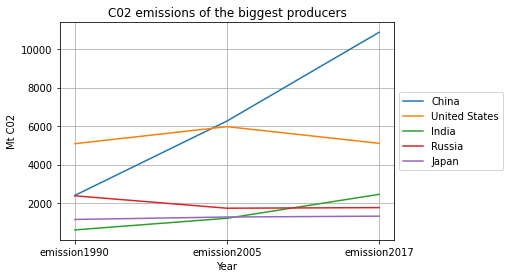

In [20]:
#Graph 1: C02 of the bigger countries

#sort on 2017 column
sortedemissions = emissions.sort_values("emission2017", ascending=False)

#only include first 5
biggestproducers = sortedemissions.iloc[0:5, 0:4]

#make graph
fig, ax = plt.subplots()

years = biggestproducers.columns[1:4]

for index, row in biggestproducers.iterrows():
  plt.plot(years, row[1:], label = row[0])

plt.title("C02 emissions of the biggest producers")
plt.xlabel("Year")
plt.ylabel("Mt C02")
plt.legend(loc= "center left", bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

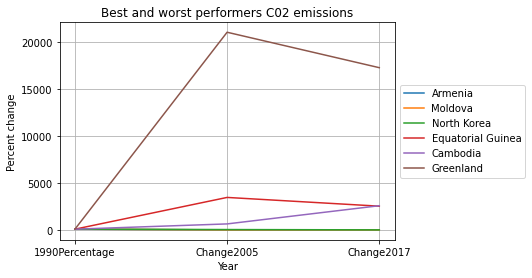

In [21]:
#Graph 2.1: worst and best changers

#add columns
emissions["1990Percentage"] = 100
emissions['Change2005'] = (emissions.loc[:,'emission2005'] / emissions.loc[:,'emission1990']) * 100
emissions["Change2017"] = (emissions.loc[:, "emission2017"] / emissions.loc[:, "emission1990"]) * 100

#make new data frame with only the "relative columns"
relativeemissions = emissions.loc[:, ["country", "1990Percentage", "Change2005", "Change2017"]]

#sort on the best and worst scoring countries
relativeemissions = relativeemissions.sort_values("Change2017")

#make new dataframe which only includes the best and worst scoring countries
best_worst_relativeemissions = relativeemissions.iloc[[0, 1, 3, -3, -2, -1], :]

#make chart
fig, ax = plt.subplots()

years = best_worst_relativeemissions.columns[1:4]

for index, row in best_worst_relativeemissions.iterrows():
  plt.plot(years, row[1:], label = row[0])

plt.title("Best and worst performers C02 emissions")
plt.xlabel("Year")
plt.ylabel("Percent change")
plt.legend(loc= "center left", bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()


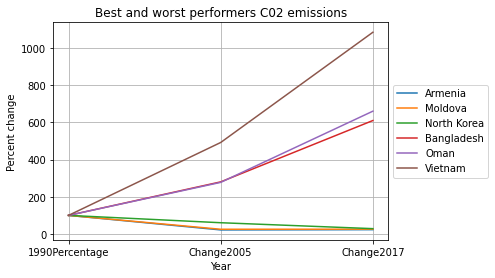

In [24]:
#Graph 2.2 with countries > 5Mt C02 Emissions

#only include countries with an emission bigger dan 5 Mt C02
relativeemissions = emissions.loc[emissions.emission1990 > 5.0]
relativeemissions = relativeemissions.loc[:, ["country", "1990Percentage", "Change2005", "Change2017"]]

#sort on the best and worst scoring countries
relativeemissions = relativeemissions.sort_values("Change2017")

#make new dataframe which only includes the best and worst scoring countries
new_best_worst_relativeemissions = relativeemissions.iloc[[0, 1, 3, -3, -2, -1], :]

#make chart
fig, ax = plt.subplots()

years = new_best_worst_relativeemissions.columns[1:4]

for index, row in new_best_worst_relativeemissions.iterrows():
  plt.plot(years, row[1:], label = row[0])

plt.title("Best and worst performers C02 emissions")
plt.xlabel("Year")
plt.ylabel("Percent change")
plt.legend(loc= "center left", bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()